In [1]:
import pandas as pd
import numpy as np

import random

In [3]:
unique_id = ['A','B', 'C', 'D']
sample_size = 10
date_range = pd.date_range('2012-10-01', periods=sample_size, freq='d')
salary = [random.randint(500, 5000) for _ in range(sample_size*len(unique_id))]

In [4]:
pdf = pd.DataFrame({'ID':[x for x in unique_id for _ in range(sample_size)],
                    'dt':list(pd.Series(date_range.format()))*4,
                    'salary':salary})

In [5]:
pdf

,ID,dt,salary
0,A,2012-10-01,3138
1,A,2012-10-02,4911
2,A,2012-10-03,4663
3,A,2012-10-04,4901
4,A,2012-10-05,1153
5,A,2012-10-06,3230
6,A,2012-10-07,2520
7,A,2012-10-08,1440
8,A,2012-10-09,1506
9,A,2012-10-10,804


In [22]:
pdf.groupby('ID', as_index=False).agg({'dt':['min','max']})

ID          dt            
             min         max
0  A  2012-10-01  2012-10-10
1  B  2012-10-01  2012-10-10
2  C  2012-10-01  2012-10-10
3  D  2012-10-01  2012-10-10

In [24]:
pdf.groupby('ID').dt.min().reset_index()

,ID,dt
0,A,2012-10-01
1,B,2012-10-01
2,C,2012-10-01
3,D,2012-10-01


In [13]:
pdf['salary'] = pdf['salary'].replace(3138, 100)

In [14]:
pdf['salary']

0      100
1     4911
2     4663
3     4901
4     1153
5     3230
6     2520
7     1440
8     1506
9      804
10    1329
11    3848
12    4917
13    3969
14    2310
15    2598
16     623
17    2603
18    3404
19    3314
20    1488
21    4588
22    4526
23    3965
24    3921
25    4994
26    3236
27    1648
28    4705
29    1976
30    3492
31    4915
32    2373
33    2766
34    2113
35    4818
36    2511
37    2139
38    4108
39     658
Name: salary, dtype: int64

In [7]:
stat = pdf.groupby('ID').agg({'salary':['max', 'min']})

In [41]:
pdf = pdf.merge(stat, on=['ID'])

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [45]:
pdf.columns[3]

('salary', 'max')

In [46]:
pdf.rename(columns={"'salary', 'max'":'max_salary', "'salary', 'min'":'min_salary'})

,ID,dt,salary,"(salary, max)","(salary, min)"
0,A,2012-10-01,936,4950,730
1,A,2012-10-02,730,4950,730
2,A,2012-10-03,4650,4950,730
3,A,2012-10-04,4481,4950,730
4,A,2012-10-05,4950,4950,730
5,A,2012-10-06,833,4950,730
6,A,2012-10-07,4939,4950,730
7,A,2012-10-08,1944,4950,730
8,A,2012-10-09,4034,4950,730
9,A,2012-10-10,1902,4950,730


In [15]:
mylist = [1, 2, 5, 100]

In [16]:
import seaborn as sns

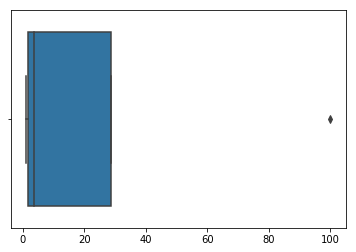

In [17]:
sns.boxplot(mylist)

In [21]:
from sklearn import preprocessing

In [22]:
scaler = preprocessing.StandardScaler()

In [28]:
scaled = scaler.fit_transform(np.array(mylist).reshape(-1,1))

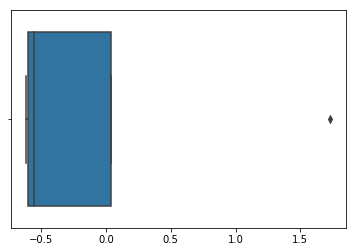

In [29]:
sns.boxplot(scaled)

In [34]:
mymat = np.random.rand(12).reshape(3,4)

In [35]:
mymat

array([[0.94232174, 0.33264466, 0.11267832, 0.32922491],
       [0.44474431, 0.08620938, 0.46262611, 0.44256792],
       [0.01580062, 0.03201275, 0.9814183 , 0.71078055]])

In [36]:
mymat.shape

(3, 4)

In [43]:
(mymat[:,0] + mymat[:,1]).shape

(3,)

In [39]:
(mymat[:,0] + mymat[:,1]).reshape(3,1)

array([[1.2749664 ],
       [0.53095369],
       [0.04781337]])

In [38]:
#np.vstack((mymat, [1,1,1,1]))

In [40]:
np.hstack((mymat, (mymat[:,0] + mymat[:,1]).reshape(3,1)))

array([[0.94232174, 0.33264466, 0.11267832, 0.32922491, 1.2749664 ],
       [0.44474431, 0.08620938, 0.46262611, 0.44256792, 0.53095369],
       [0.01580062, 0.03201275, 0.9814183 , 0.71078055, 0.04781337]])

In [6]:
mydict = {'a':2, 'c':10, 'b':1}

In [7]:
mydict

{'a': 2, 'c': 10, 'b': 1}

In [18]:
sorted(mydict.items(), key=lambda x:x[1], reverse=False)

[('b', 1), ('a', 2), ('c', 10)]

In [15]:
mydict.items()

dict_items([('a', 2), ('c', 10), ('b', 1)])

In [23]:
mytuple = [('b', 1), ('a', 2), ('c', 10)]

In [24]:
dict(mytuple)

{'b': 1, 'a': 2, 'c': 10}

In [27]:
mylist = np.array([2,3,4])

In [29]:
list(mylist/2)

[1.0, 1.5, 2.0]

In [30]:
mylist = ['1', 'one', 'a']

In [35]:
[x for x in mylist for _ in range(3)]

['1', '1', '1', 'one', 'one', 'one', 'a', 'a', 'a']

In [33]:
mylist*3

['1', 'one', 'a', '1', 'one', 'a', '1', 'one', 'a']